In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [59]:
df_train

,ID,fullAddress,postcode,country,outcode,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,tenure,propertyType,currentEnergyRating,sale_month,sale_year,price
0,0,"38 Adelina Grove, London, E1 3AD",E1 3AD,England,E1,51.519406,-0.053261,NaN,3.0,80.0,1.0,Freehold,Semi-Detached House,C,1,1995,77000
1,1,"6 Cleveland Grove, London, E1 4XL",E1 4XL,England,E1,51.521261,-0.053384,2.0,4.0,110.0,1.0,Leasehold,Terrace Property,D,1,1995,89995
2,2,"65 Sanderstead Road, London, E10 7PW",E10 7PW,England,E10,51.569054,-0.034892,1.0,3.0,84.0,1.0,Freehold,Terrace Property,D,1,1995,59000
3,3,"5 Queenswood Gardens, London, E11 3SE",E11 3SE,England,E11,51.564212,0.026292,NaN,2.0,72.0,1.0,Leasehold,Purpose Built Flat,NaN,1,1995,51500
4,4,"12 Woodlands Road, London, E11 4RW",E11 4RW,England,E11,51.563430,0.006260,1.0,3.0,104.0,1.0,Freehold,Mid Terrace House,D,1,1995,63500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266320,266320,"Flat 5, 4 Acton Street, London, WC1X 9NA",WC1X 9NA,England,WC1X,51.528933,-0.116113,2.0,2.0,83.0,1.0,Leasehold,Flat/Maisonette,E,12,2023,800000
266321,266321,"7 Spring House, Margery Street, London, WC1X 0HT",WC1X 0HT,England,WC1X,51.527292,-0.112005,1.0,2.0,69.0,1.0,Leasehold,Converted Flat,C,12,2023,550000
266322,266322,"Flat 2, Goldsmith Court, Stukeley Street, Lond...",WC2B 5LF,England,WC2B,51.516084,-0.123581,1.0,2.0,50.0,1.0,Leasehold,Purpose Built Flat,C,12,2023,730000
266323,266323,"Unit 205, 25 Floral Street, London, WC2E 9DS",WC2E 9DS,England,WC2E,51.511861,-0.125419,2.0,2.0,130.0,1.0,Leasehold,Flat/Maisonette,B,12,2023,3275000


In [60]:
df_test

,ID,fullAddress,postcode,country,outcode,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,tenure,propertyType,currentEnergyRating,sale_month,sale_year
0,266325,"Flat 7, Philip House, Heneage Street, London, ...",E1 5LW,England,E1,51.518783,-0.071003,1.0,2.0,54.0,1.0,Leasehold,Flat/Maisonette,D,1,2024
1,266326,"17 Bowmans Mews, London, E1 8RY",E1 8RY,England,E1,51.511624,-0.068236,1.0,1.0,48.0,1.0,Leasehold,Purpose Built Flat,D,1,2024
2,266327,"Flat 30, Everard House, Boyd Street, London, E...",E1 1LY,England,E1,51.512737,-0.066502,1.0,NaN,32.0,NaN,Leasehold,Flat/Maisonette,C,1,2024
3,266328,"Flat 1, Wilton Court, Cavell Street, London, E...",E1 2BN,England,E1,51.516165,-0.057334,1.0,3.0,85.0,1.0,Leasehold,Purpose Built Flat,D,1,2024
4,266329,"45 Musbury Street, London, E1 0PJ",E1 0PJ,England,E1,51.515115,-0.051008,1.0,2.0,82.0,1.0,Leasehold,Flat/Maisonette,C,1,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16542,282867,"Flat 479, Russell Court, 3–16 Woburn Place, Lo...",WC1H 0NL,England,WC1H,51.523417,-0.126119,1.0,NaN,24.0,1.0,Leasehold,Purpose Built Flat,C,8,2024
16543,282868,"Flat 479, Russell Court, 3–16 Woburn Place, Lo...",WC1H 0NL,England,WC1H,51.523417,-0.126119,1.0,NaN,24.0,1.0,Leasehold,Purpose Built Flat,C,8,2024
16544,282869,"Flat 93, Clare Court, Judd Street, London, WC1...",WC1H 9QW,England,WC1H,51.526629,-0.123421,1.0,1.0,42.0,1.0,Leasehold,Flat/Maisonette,D,8,2024
16545,282870,"Flat 1, 28 King's Mews, London, WC1N 2JB",WC1N 2JB,England,WC1N,51.521686,-0.114010,NaN,NaN,NaN,NaN,NaN,NaN,B,8,2024


In [61]:
df_train = df_train.drop('ID', axis=1)
df_test = df_test.drop('ID', axis=1)


In [62]:
df_train.head(3)

,fullAddress,postcode,country,outcode,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,tenure,propertyType,currentEnergyRating,sale_month,sale_year,price
0,"38 Adelina Grove, London, E1 3AD",E1 3AD,England,E1,51.519406,-0.053261,NaN,3.0,80.0,1.0,Freehold,Semi-Detached House,C,1,1995,77000
1,"6 Cleveland Grove, London, E1 4XL",E1 4XL,England,E1,51.521261,-0.053384,2.0,4.0,110.0,1.0,Leasehold,Terrace Property,D,1,1995,89995
2,"65 Sanderstead Road, London, E10 7PW",E10 7PW,England,E10,51.569054,-0.034892,1.0,3.0,84.0,1.0,Freehold,Terrace Property,D,1,1995,59000


In [63]:
df_test.head(3)

,fullAddress,postcode,country,outcode,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,tenure,propertyType,currentEnergyRating,sale_month,sale_year
0,"Flat 7, Philip House, Heneage Street, London, ...",E1 5LW,England,E1,51.518783,-0.071003,1.0,2.0,54.0,1.0,Leasehold,Flat/Maisonette,D,1,2024
1,"17 Bowmans Mews, London, E1 8RY",E1 8RY,England,E1,51.511624,-0.068236,1.0,1.0,48.0,1.0,Leasehold,Purpose Built Flat,D,1,2024
2,"Flat 30, Everard House, Boyd Street, London, E...",E1 1LY,England,E1,51.512737,-0.066502,1.0,NaN,32.0,NaN,Leasehold,Flat/Maisonette,C,1,2024


In [64]:
set(df_test['fullAddress']).difference(set(df_train['fullAddress']))

{'2A Wilmer Way, London, N14 7JB',
 'Flat 13, Gower Mews Mansions, Gower Mews, London, WC1E 6HR',
 'Flat 1, 3 Park Parade, London, NW10 4JH',
 '26 Waverley Avenue, London, E4 8HT',
 '39 Charles Ii Place, London, SW3 4NG',
 'Flat 22, Hampton Court, Rotherhithe Street, London, SE16 5SU',
 '28 Gap Road, London, SW19 8JG',
 '4 Beresford Road, London, N2 8AT',
 '210 Acton Lane, London, W4 5DL',
 'Flat 6, Mascalls Court, Victoria Way, London, SE7 7TU',
 '7 Linnell Close, London, NW11 7LN',
 '172 Humber Road, London, SE3 7EF',
 '18 Hofland Road, London, W14 0LN',
 '7 Elmgreen Close, London, E15 4BS',
 '24 Kingsand Road, London, SE12 0LE',
 '34A Reeves Avenue, London, NW9 8LP',
 '110 Eastcombe Avenue, London, SE7 7LW',
 'Flat 8, Everdene, 10 Hardy Road, Blackheath, SE3 7NP',
 '38 Airedale Road, London, W5 4SD',
 '87 Buckhold Road, London, SW18 4AT',
 '22 Edison Grove, London, SE18 2DN',
 'Flat 26, Eaton Court, 111 High Road, London, E18 2JU',
 'Flat 23, Perth Court Denmark Hill Estate, Basingd

In [65]:
df_train = df_train.drop('fullAddress', axis=1)
df_test = df_test.drop('fullAddress', axis=1)

In [66]:
df_train = df_train.drop('postcode', axis=1)
df_test = df_test.drop('postcode', axis=1)

In [67]:
df_train = df_train.drop('country', axis=1)
df_test = df_test.drop('country', axis=1)

In [68]:
df_train = df_train.drop('outcode', axis=1)
df_test = df_test.drop('outcode', axis=1)

In [69]:
df_train.isna().sum()

latitude                   0
longitude                  0
bathrooms              48479
bedrooms               24843
floorAreaSqM           13806
livingRooms            37040
tenure                  5721
propertyType             508
currentEnergyRating    56814
sale_month                 0
sale_year                  0
price                      0
dtype: int64

In [70]:
df_test.isna().sum()

latitude                  0
longitude                 0
bathrooms              2624
bedrooms               1375
floorAreaSqM           2006
livingRooms            2095
tenure                  590
propertyType            167
currentEnergyRating    1497
sale_month                0
sale_year                 0
dtype: int64

<Axes: xlabel='bathrooms'>

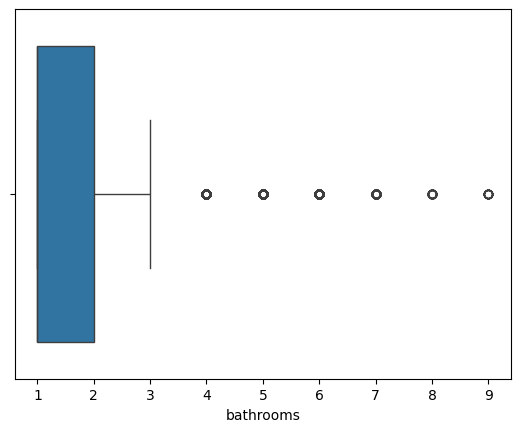

In [71]:
sns.boxplot(x=df_train['bathrooms'])

In [72]:
df_train[df_train['bathrooms'] == 6]

,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,tenure,propertyType,currentEnergyRating,sale_month,sale_year,price
1069,51.583963,-0.167144,6.0,6.0,457.0,3.0,Freehold,Detached House,NaN,4,1995,1000000
2520,51.493517,-0.162151,6.0,5.0,318.0,1.0,Freehold,Terrace Property,D,7,1995,795000
2737,51.573189,-0.176654,6.0,7.0,450.0,6.0,Freehold,Detached House,E,8,1995,1250000
3495,51.551127,-0.036213,6.0,3.0,110.0,2.0,Freehold,Mid Terrace House,B,10,1995,81750
3748,51.461645,-0.148099,6.0,6.0,NaN,3.0,Freehold,End Terrace House,NaN,10,1995,915000
...,...,...,...,...,...,...,...,...,...,...,...,...
259727,51.493517,-0.162151,6.0,5.0,318.0,1.0,Freehold,Terrace Property,D,10,2023,5750000
260003,51.521241,-0.149906,6.0,6.0,NaN,4.0,Freehold,End Terrace House,D,10,2023,8750000
261623,51.548819,-0.173855,6.0,7.0,345.0,4.0,Freehold,Detached House,F,11,2023,11000000
264438,51.526434,-0.145083,6.0,5.0,474.0,4.0,Leasehold,Flat/Maisonette,D,12,2023,6200000


In [73]:
df_train[df_train['bathrooms'].isna()]

,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,tenure,propertyType,currentEnergyRating,sale_month,sale_year,price
0,51.519406,-0.053261,NaN,3.0,80.0,1.0,Freehold,Semi-Detached House,C,1,1995,77000
3,51.564212,0.026292,NaN,2.0,72.0,1.0,Leasehold,Purpose Built Flat,NaN,1,1995,51500
17,51.611069,-0.014173,NaN,NaN,105.0,NaN,Freehold,Mid Terrace House,D,1,1995,74750
24,51.522189,-0.096734,NaN,NaN,35.0,NaN,Leasehold,Flat/Maisonette,C,1,1995,39000
28,51.519029,-0.096001,NaN,2.0,NaN,NaN,Leasehold,Flat/Maisonette,NaN,1,1995,112000
...,...,...,...,...,...,...,...,...,...,...,...,...
266292,51.526085,-0.179638,NaN,NaN,73.0,NaN,Leasehold,Flat/Maisonette,C,12,2023,775000
266294,51.531797,-0.184961,NaN,NaN,115.0,NaN,NaN,Flat/Maisonette,D,12,2023,890000
266298,51.526708,-0.196697,NaN,1.0,NaN,1.0,Freehold,Converted Flat,NaN,12,2023,468000
266316,51.525461,-0.112816,NaN,3.0,NaN,1.0,Leasehold,Flat/Maisonette,B,12,2023,1610700


In [74]:
df_train[(df_train['bathrooms'] == 1) & (df_train['bedrooms'] == 1)][['price', 'sale_year']].mean()

price        322777.811514
sale_year      2011.900882
dtype: float64

In [75]:
df_train[(df_train['bathrooms'].isna()) & (df_train['bedrooms'] == 1) & (df_train['price'] > 250000) & (df_train['price'] < 400000)]['bathrooms']

9843     NaN
10800    NaN
11334    NaN
11337    NaN
12437    NaN
          ..
266001   NaN
266017   NaN
266022   NaN
266097   NaN
266220   NaN
Name: bathrooms, Length: 1589, dtype: float64

<Axes: xlabel='bathrooms', ylabel='count'>

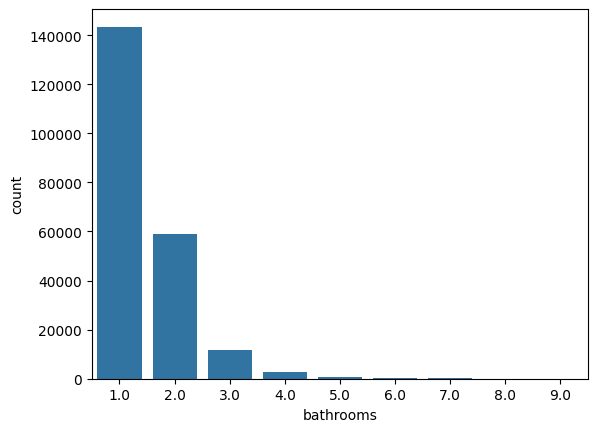

In [76]:
sns.countplot(x=df_train['bathrooms'])

In [77]:
df_train['bathrooms'] = df_train['bathrooms'].fillna(df_train['bathrooms'].median())

In [78]:
df_test['bathrooms'] = df_test['bathrooms'].fillna(df_test['bathrooms'].median())

In [106]:
df_train.isna().sum()

latitude               0
longitude              0
bathrooms              0
bedrooms               0
floorAreaSqM           0
livingRooms            0
tenure                 0
propertyType           0
currentEnergyRating    0
sale_month             0
sale_year              0
price                  0
dtype: int64

In [80]:
df_train['bedrooms'] = df_train['bedrooms'].fillna(df_train['bedrooms'].median())
df_test['bedrooms'] = df_test['bedrooms'].fillna(df_test['bedrooms'].median())

In [83]:
df_train['floorAreaSqM'] = df_train['floorAreaSqM'].fillna(df_train['floorAreaSqM'].median())
df_test['floorAreaSqM'] = df_test['floorAreaSqM'].fillna(df_test['floorAreaSqM'].median())

In [85]:
df_train['livingRooms'] = df_train['livingRooms'].fillna(df_train['livingRooms'].median())
df_test['livingRooms'] = df_test['livingRooms'].fillna(df_test['livingRooms'].median())

In [89]:
from sklearn.preprocessing import LabelEncoder

In [90]:
label = LabelEncoder()

In [91]:
df_train['tenure'] = label.fit_transform(df_train['tenure'])
df_test['tenure'] = label.transform(df_test['tenure'])

In [95]:
set(df_train['propertyType'])

{'Bungalow Property',
 'Converted Flat',
 'Detached Bungalow',
 'Detached House',
 'Detached Property',
 'End Terrace Bungalow',
 'End Terrace House',
 'End Terrace Property',
 'Flat/Maisonette',
 'Mid Terrace Bungalow',
 'Mid Terrace House',
 'Mid Terrace Property',
 'Purpose Built Flat',
 'Semi-Detached Bungalow',
 'Semi-Detached House',
 'Semi-Detached Property',
 'Terrace Property',
 'Terraced',
 'Terraced Bungalow',
 nan}

In [97]:
set(df_test['propertyType']).difference(set(df_train['propertyType']))


set()

In [98]:
df_train['propertyType'] = label.fit_transform(df_train['propertyType'])
df_test['propertyType'] = label.transform(df_test['propertyType'])

In [104]:
set(df_train['currentEnergyRating'])

{0, 1, 2, 3, 4, 5, 6, 7}

In [105]:
set(df_test['currentEnergyRating'])

{0, 1, 2, 3, 4, 5, 6, 7}

In [103]:
df_train['currentEnergyRating'] = label.fit_transform(df_train['currentEnergyRating'])
df_test['currentEnergyRating'] = label.transform(df_test['currentEnergyRating'])

In [107]:
df_test.isna().sum()

latitude               0
longitude              0
bathrooms              0
bedrooms               0
floorAreaSqM           0
livingRooms            0
tenure                 0
propertyType           0
currentEnergyRating    0
sale_month             0
sale_year              0
dtype: int64

In [113]:
X_train = df_train.drop('price', axis=1)
y_train = df_train['price']
X_test = df_test.copy()

In [114]:
from sklearn.preprocessing import MinMaxScaler

In [115]:
scaler = MinMaxScaler()

In [116]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [118]:
X_train

array([[0.47729737, 0.60413671, 0.        , ..., 0.28571429, 0.        ,
        0.        ],
       [0.48391786, 0.6038844 , 0.125     , ..., 0.42857143, 0.        ,
        0.        ],
       [0.65453879, 0.64190835, 0.        , ..., 0.42857143, 0.        ,
        0.        ],
       ...,
       [0.46543474, 0.4595356 , 0.        , ..., 0.28571429, 1.        ,
        1.        ],
       [0.45036023, 0.45575669, 0.125     , ..., 0.14285714, 1.        ,
        1.        ],
       [0.44107904, 0.46029253, 0.        , ..., 1.        , 1.        ,
        1.        ]])

In [151]:
from sklearn.model_selection import train_test_split

In [152]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [153]:
from keras import Sequential
from keras.layers import Dense

In [160]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [170]:
model = RandomForestRegressor()
params = {
    'n_estimators': [65, 100],
    'max_depth': [6, 10, None],
    'max_features': [4, 6, None]
}

In [171]:
final_model = GridSearchCV(model, param_grid=params, cv=3, verbose=2)

In [ ]:
final_model.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END .......max_depth=6, max_features=4, n_estimators=65; total time=   7.9s
[CV] END .......max_depth=6, max_features=4, n_estimators=65; total time=   7.8s
[CV] END .......max_depth=6, max_features=4, n_estimators=65; total time=   7.9s
[CV] END ......max_depth=6, max_features=4, n_estimators=100; total time=  12.3s
[CV] END ......max_depth=6, max_features=4, n_estimators=100; total time=  12.1s
[CV] END ......max_depth=6, max_features=4, n_estimators=100; total time=  12.3s
[CV] END .......max_depth=6, max_features=6, n_estimators=65; total time=  11.3s
[CV] END .......max_depth=6, max_features=6, n_estimators=65; total time=  11.4s
[CV] END .......max_depth=6, max_features=6, n_estimators=65; total time=  11.4s
[CV] END ......max_depth=6, max_features=6, n_estimators=100; total time=  17.6s
[CV] END ......max_depth=6, max_features=6, n_estimators=100; total time=  17.4s
[CV] END ......max_depth=6, max_features=6, n_es

In [154]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(11, )))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))

C:\Users\ASUS\Desktop\ML_LOGIX_\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [155]:
model.compile(optimizer='adam', metrics=['mae'], loss='mae')

In [156]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
7491/7491 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 303899.2188 - mae: 303899.2188 - val_loss: 212204.5469 - val_mae: 212204.5469
Epoch 2/10
7491/7491 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 215010.2344 - mae: 215010.2344 - val_loss: 187863.8906 - val_mae: 187863.8906
Epoch 3/10
7491/7491 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 195599.8594 - mae: 195599.8594 - val_loss: 180169.3438 - val_mae: 180169.3438
Epoch 4/10
7491/7491 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 189381.7656 - mae: 189381.7656 - val_loss: 182456.9688 - val_mae: 182456.9688
Epoch 5/10
7491/7491 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 186871.1250 - mae: 186871.1250 - val_loss: 178659.9844 - val_mae: 178659.9844
Epoch 6/10
7491/7491 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 188147.2812 - mae: 188147.2812 - val_loss: 183479.9688 - val_mae: 183479.9688
Epoch 7/10
7491/7491 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 183210.9062 - mae: 183210.9062 - val_loss: 172609.8281 - val_mae: 172609.8281
Epoch 8/10
74

In [147]:
y_pred = model.predict(X_test)

518/518 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [148]:
df_sub = pd.read_csv('sample_submission.csv')

In [149]:
df_sub['price'] = y_pred

In [150]:
df_sub.to_csv('sub.csv', index=False, index_label=False)